Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(10, 64, 64, 3)
(10, 64, 64, 3)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization_53 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
activation_53 (Activation)   (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_54 (Batc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


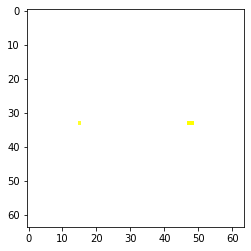

In [12]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

drive.mount('/content/gdrive')

train_datas = os.listdir("/content/gdrive/My Drive/data/blur/")
train_labels = os.listdir("/content/gdrive/My Drive/data/clean/")
train_datas.sort()
train_labels.sort()

train_data = []
train_label = []

for i in range(len(train_datas)):
  train_data.append(cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/blur/"+train_datas[i]),cv2.COLOR_BGR2RGB))
  train_label.append(cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/clean/"+train_labels[i]),cv2.COLOR_BGR2RGB))

train_data = np.array(train_data).astype(int)
train_label = np.array(train_label).astype(int)

x_train = train_data[:7]
y_train = train_label[:7]
val_x = train_data[7:]
val_y = train_label[7:]


print(train_data.shape)
print(train_label.shape)


'''# build model
model = models.Sequential()
data_input = Input(shape=(64,64,3))
model.add(layers.Conv2D(64, (15,15), padding='same', input_shape=(64,64,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2), strides=1, padding='same'))
model.add(layers.Conv2D(128, (9,9), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2), strides=1, padding='same'))
model.add(layers.Conv2D(256, (7,7), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2), strides=1, padding='same'))
model.add(layers.Conv2D(128, (7,7), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2), strides=1, padding='same'))
model.add(layers.Conv2D(64, (5,5), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2), strides=1, padding='same'))
data_output = layers.Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')

model = models.Model(inputs= data_input, outputs=data_output )
model.summary()'''



from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
deblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )
deblur_CNN.summary()


adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer=adam,
              loss='mean_squared_error',
              metrics=['accuracy'])
deblur_CNN.load_weights('/content/gdrive/My Drive/celebA_deblur_cnn_weights.h5')

'''history = deblur_CNN.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=1,
                    validation_data=(val_x,val_y))'''

Deblurred = deblur_CNN.predict(x_train)
#Deblurred = np.clip(Deblurred, 0, 255)

TypeError: ignored

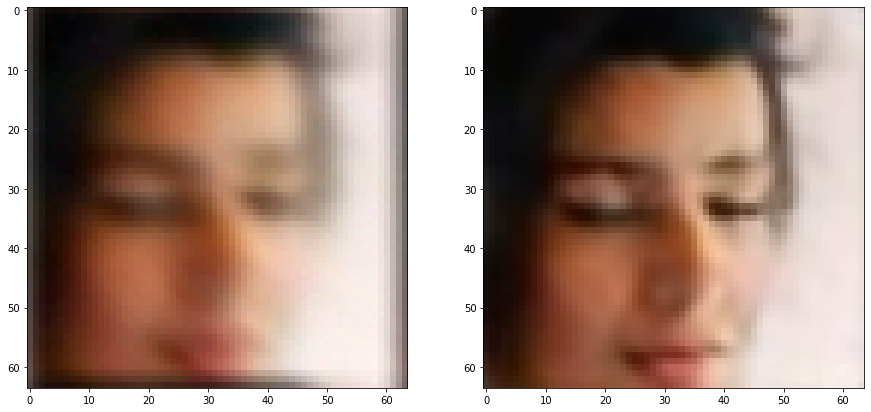

In [17]:
#print(Deblurred[0])
_,pos = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
pos[0].imshow(train_data[1]/255)
pos[1].imshow(Deblurred[1]/255)

plt.imshow()
